# Preliminary (libraries, cache, functions, color palettes)

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-notebook')
import fastf1
from fastf1.core import Laps
import os
import seaborn as sns
import numpy as np

In [2]:
#Generating cache folder
cache_folder = 'cache_folder'
if not os.path.exists(cache_folder):
    os.makedirs(cache_folder)

fastf1.Cache.enable_cache(cache_folder)

In [3]:
def GetGapsInRace(session_laps):
    '''
    Generate new column containing the gap from the driver in front at the start of the lap
    Use it like this:
        - Get fastf1 session object
        - extract session.laps attribute (it is a df)
        - generate a new df with this funciont as new_df = GetGapsInRace(mysession.laps)
    '''
    #Empty gaps list
    gaps = []
    #Sort dataset so that we can iterate and directly identify drivers in front
    sorted_session_laps = session_laps.sort_values(['LapNumber','Position'])
    #iterate through dataset
    for row in range(0,sorted_session_laps.shape[0],1):
        #create specific lap object
        lap = sorted_session_laps.iloc[row]
        #check position existance
        if lap.Position:
            #avoid using lap 1, for obvious reasons
            if lap.LapNumber!=1:
                #skip position 1, their gap is always 0.000
                if lap.Position!=1:
                    print('\n\n',lap.LapNumber)
                    print(lap.LapStartTime,'laptime',lap.Driver,lap.LapNumber,'#')
                    print(sorted_session_laps.iloc[row-1]['LapStartTime'],'previous laptime',sorted_session_laps.iloc[row-1]['Driver'],sorted_session_laps.iloc[row-1]['LapNumber'])
                    gap_timedelta = lap.LapStartTime - sorted_session_laps.iloc[row-1]['LapStartTime']
                    print(gap_timedelta)
                    gap_seconds = gap_timedelta.total_seconds()
                    print(gap_seconds)
                    gaps.append(gap_seconds)
                else:
                    #add gap for position 1
                    print('adding gap 0 for first position')
                    gaps.append(float(0.000))
            else:
                print('lap 1 is skipped')
                gaps.append(float(0.000))
        else:
            print('position not found')
            gaps.append(np.NaN)
    sorted_session_laps['GapInSeconds'] = gaps
    return sorted_session_laps

In [4]:
#Extract season2025 events list 
#just for reference, not used later
season2025 = fastf1.get_event_schedule(2025)
season2025.head(6)

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session1DateUtc,...,Session3,Session3Date,Session3DateUtc,Session4,Session4Date,Session4DateUtc,Session5,Session5Date,Session5DateUtc,F1ApiSupport
0,0,Bahrain,Sakhir,FORMULA 1 ARAMCO PRE-SEASON TESTING 2025,2025-02-28,Pre-Season Testing,testing,Practice 1,2025-02-26 10:00:00+03:00,2025-02-26 07:00:00,...,Practice 3,2025-02-28 10:00:00+03:00,2025-02-28 07:00:00,None,NaT,NaT,None,NaT,NaT,True
1,1,Australia,Melbourne,FORMULA 1 LOUIS VUITTON AUSTRALIAN GRAND PRIX ...,2025-03-16,Australian Grand Prix,conventional,Practice 1,2025-03-14 12:30:00+11:00,2025-03-14 01:30:00,...,Practice 3,2025-03-15 12:30:00+11:00,2025-03-15 01:30:00,Qualifying,2025-03-15 16:00:00+11:00,2025-03-15 05:00:00,Race,2025-03-16 15:00:00+11:00,2025-03-16 04:00:00,True
2,2,China,Shanghai,FORMULA 1 HEINEKEN CHINESE GRAND PRIX 2025,2025-03-23,Chinese Grand Prix,sprint_qualifying,Practice 1,2025-03-21 11:30:00+08:00,2025-03-21 03:30:00,...,Sprint,2025-03-22 11:00:00+08:00,2025-03-22 03:00:00,Qualifying,2025-03-22 15:00:00+08:00,2025-03-22 07:00:00,Race,2025-03-23 15:00:00+08:00,2025-03-23 07:00:00,True
3,3,Japan,Suzuka,FORMULA 1 LENOVO JAPANESE GRAND PRIX 2025,2025-04-06,Japanese Grand Prix,conventional,Practice 1,2025-04-04 11:30:00+09:00,2025-04-04 02:30:00,...,Practice 3,2025-04-05 11:30:00+09:00,2025-04-05 02:30:00,Qualifying,2025-04-05 15:00:00+09:00,2025-04-05 06:00:00,Race,2025-04-06 14:00:00+09:00,2025-04-06 05:00:00,True
4,4,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2025,2025-04-13,Bahrain Grand Prix,conventional,Practice 1,2025-04-11 14:30:00+03:00,2025-04-11 11:30:00,...,Practice 3,2025-04-12 15:30:00+03:00,2025-04-12 12:30:00,Qualifying,2025-04-12 19:00:00+03:00,2025-04-12 16:00:00,Race,2025-04-13 18:00:00+03:00,2025-04-13 15:00:00,True
5,5,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2025,2025-04-20,Saudi Arabian Grand Prix,conventional,Practice 1,2025-04-18 16:30:00+03:00,2025-04-18 13:30:00,...,Practice 3,2025-04-19 16:30:00+03:00,2025-04-19 13:30:00,Qualifying,2025-04-19 20:00:00+03:00,2025-04-19 17:00:00,Race,2025-04-20 20:00:00+03:00,2025-04-20 17:00:00,True


In [5]:
team_colors = {
    "Alpine": "#F282B4",       # Pink
    "Aston Martin": "#037A68", # Green
    "Ferrari": "#821729",      # Burgundy
    "Haas F1 Team": "#EB0A1E",         # Red
    "Kick Sauber": "#53FC18",  # Bright Green
    "McLaren": "#FF8700",      # Papaya Orange
    "Mercedes": "#C8CCCE",     # Silver/Gray
    "Racing Bulls": "#FFFFFF", # White
    "Red Bull Racing": "#003773",     # Navy Blue
    "Williams": "#00A0DE",     # Blue
}
driver_colors = {
    # Red Bull Racing
    "VER": "#002D5A",  # Max Verstappen (Deep Navy Blue)
    "LAW": "#003F7D",  # Liam Lawson (Brighter Blue)

    # Ferrari
    "LEC": "#9B1B30",  # Charles Leclerc (Darker Burgundy)
    "HAM": "#C81D37",  # Lewis Hamilton (Brighter Red)

    # Mercedes
    "RUS": "#ACB2B5",  # George Russell (Dark Silver)
    "ANT": "#D0D3D4",  # Andrea Kimi Antonelli (Lighter Silver)

    # McLaren
    "NOR": "#FF9800",  # Lando Norris (Papaya Orange)
    "PIA": "#FFB766",  # Oscar Piastri (Lighter Papaya)

    # Aston Martin
    "ALO": "#028061",  # Fernando Alonso (Dark Green)
    "STR": "#03A678",  # Lance Stroll (Lighter Green)

    # Alpine
    "GAS": "#FF66A1",  # Pierre Gasly (Light Pink)
    "DOO": "#D94A90",  # Jack Doohan (Darker Pink)

    # Williams
    "ALB": "#0096C9",  # Alexander Albon (Deep Blue)
    "SAI": "#00B6F1",  # Carlos Sainz (Sky Blue)

    # Racing Bulls
    "HAD": "#E5E5E5",  # Isack Hadjar (Light Gray)
    "TSU": "#FFFFFF",  # Yuki Tsunoda (White)

    # Kick Sauber
    "HUL": "#4EF535",  # Nico Hülkenberg (Bright Green)
    "BOR": "#26D401",  # Gabriel Bortoleto (Darker Green)

    # Haas
    "OCO": "#D91A26",  # Esteban Ocon (Dark Red)
    "BEA": "#F52439",  # Oliver Bearman (Brighter Red)
}

# China FP1

In [6]:
#Extract China Free Practice 1 Data
china_fp1 = fastf1.get_session(2025,'China','FP1')
china_fp1.load()

core           INFO 	Loading data for Chinese Grand Prix - Practice 1 [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '5', '6', '7', '10', '12', '14', '16', '18', '22', '23', '27', '30', '31', '44', '55', '63', '81', '87']


In [7]:
#Generate dataframe from .laps attribute
china_fp1_df = china_fp1.laps

In [8]:
print(china_fp1_df.shape)
#Filter out deleted lap times
china_fp1_df = china_fp1_df[china_fp1_df['Deleted']!=True]
print(china_fp1_df.shape)
#Get only fresh_tyre stints
china_fp1_df = china_fp1_df[china_fp1_df['FreshTyre']==True]
print(china_fp1_df.shape)

(459, 31)
(459, 31)
(252, 31)


In [9]:
china_fp1_df.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [10]:
#Extract only useful variables
china_fp1_df = china_fp1.laps[['Team','Driver','DriverNumber','Compound','LapTime','LapNumber','SpeedST','Stint']]
#Delete occurrences where LapTime has not been recorded
china_fp1_df = china_fp1_df[china_fp1_df['LapTime'].isnull()!=True]
china_fp1_df.sample(10)

,Team,Driver,DriverNumber,Compound,LapTime,LapNumber,SpeedST,Stint
159,Mercedes,ANT,12,MEDIUM,0 days 00:02:23.898000,26.0,219.0,4.0
138,Mercedes,ANT,12,MEDIUM,0 days 00:02:23.941000,5.0,202.0,1.0
29,McLaren,NOR,4,MEDIUM,0 days 00:02:01.125000,6.0,204.0,1.0
44,McLaren,NOR,4,SOFT,0 days 00:01:31.504000,21.0,331.0,3.0
299,Red Bull Racing,LAW,30,MEDIUM,0 days 00:02:08.463000,8.0,251.0,1.0
59,Kick Sauber,BOR,5,MEDIUM,0 days 00:01:38.501000,13.0,313.0,2.0
395,Mercedes,RUS,63,MEDIUM,0 days 00:02:02.453000,10.0,279.0,1.0
424,McLaren,PIA,81,MEDIUM,0 days 00:01:36.485000,13.0,311.0,2.0
66,Kick Sauber,BOR,5,SOFT,0 days 00:01:34.077000,20.0,332.0,3.0
174,Aston Martin,ALO,14,MEDIUM,0 days 00:01:38.801000,14.0,315.0,3.0


In [11]:
#Extract Lap Time in total seconds (e.g.: 1:35.700 => 95.700)
china_fp1_df['LapTimeInSeconds'] = china_fp1_df['LapTime'].dt.total_seconds()
china_fp1_df.sample(10)

/var/folders/88/94pqx5n57z5crmg3w50s99y00000gn/T/ipykernel_2018/1386891660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china_fp1_df['LapTimeInSeconds'] = china_fp1_df['LapTime'].dt.total_seconds()


,Team,Driver,DriverNumber,Compound,LapTime,LapNumber,SpeedST,Stint,LapTimeInSeconds
402,Mercedes,RUS,63,MEDIUM,0 days 00:01:37.253000,17.0,318.0,2.0,97.253
419,McLaren,PIA,81,MEDIUM,0 days 00:01:53.547000,8.0,313.0,1.0,113.547
279,Kick Sauber,HUL,27,MEDIUM,0 days 00:01:34.207000,9.0,332.0,2.0,94.207
136,Mercedes,ANT,12,MEDIUM,0 days 00:01:36.268000,3.0,331.0,1.0,96.268
153,Mercedes,ANT,12,MEDIUM,0 days 00:01:38.866000,20.0,315.0,2.0,98.866
204,Ferrari,LEC,16,SOFT,0 days 00:02:16.558000,21.0,329.0,3.0,136.558
27,McLaren,NOR,4,MEDIUM,0 days 00:01:33.362000,4.0,326.0,1.0,93.362
252,Williams,ALB,23,MEDIUM,0 days 00:02:22.692000,6.0,171.0,1.0,142.692
244,Racing Bulls,TSU,22,SOFT,0 days 00:02:29.089000,21.0,189.0,3.0,149.089
34,McLaren,NOR,4,MEDIUM,0 days 00:01:44.615000,11.0,310.0,2.0,104.615


In [12]:
china_fp1_df['Driver'].value_counts()

Driver
ANT    22
SAI    20
VER    19
LAW    19
BEA    19
RUS    19
NOR    18
ALB    18
HUL    17
GAS    17
ALO    17
BOR    16
HAD    16
PIA    16
TSU    16
OCO    15
STR    14
LEC    13
HAM    12
DOO    11
Name: count, dtype: int64

<h3> Analyze stints lap times

In [13]:
ver_stints = china_fp1_df[(china_fp1_df['Driver']=='VER')]
ver_stints =  ver_stints[['Stint','LapTimeInSeconds']]
ver_stints

,Stint,LapTimeInSeconds
1,1.0,95.383
3,1.0,93.949
4,1.0,140.215
5,1.0,135.346
6,1.0,93.284
7,1.0,116.357
9,2.0,97.853
10,2.0,97.756
11,2.0,97.325
12,2.0,98.370


<Axes: xlabel='Stint', ylabel='LapTimeInSeconds'>

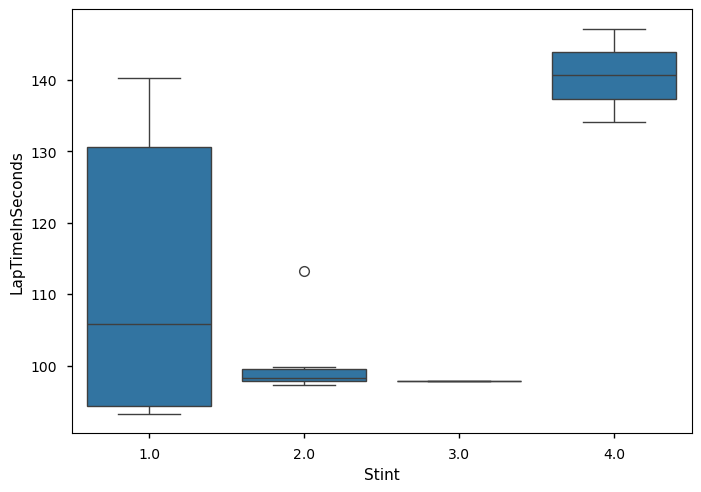

In [14]:
sns.boxplot(data=ver_stints,x='Stint',y='LapTimeInSeconds')

In [15]:
aka_stints = china_fp1_df[(china_fp1_df['Driver']=='ANT')]
aka_stints =  aka_stints[['Stint','LapTimeInSeconds']]
aka_stints

,Stint,LapTimeInSeconds
135,1.0,100.647
136,1.0,96.268
137,1.0,95.572
138,1.0,143.941
139,1.0,94.193
140,1.0,148.299
141,1.0,93.219
142,1.0,128.369
144,2.0,96.229
145,2.0,96.511


<Axes: xlabel='Stint', ylabel='LapTimeInSeconds'>

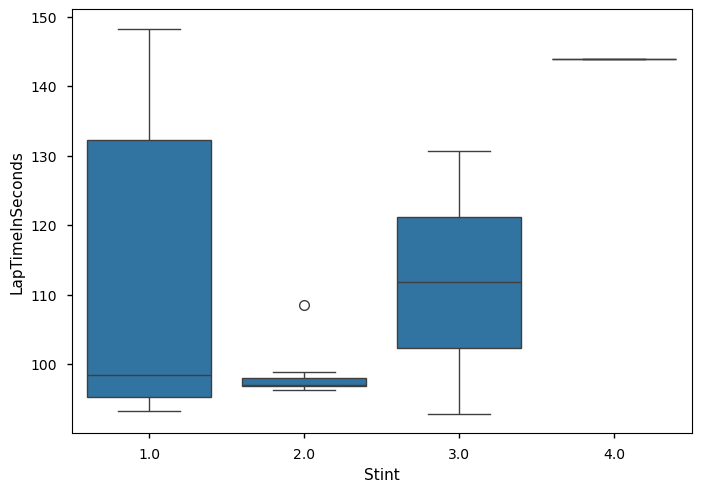

In [16]:
sns.boxplot(data=aka_stints,x='Stint',y='LapTimeInSeconds')

# China Sprint

In [17]:
#Extract china sprint data
china_sprint = fastf1.get_session(2025,'China','Sprint')
china_sprint.load()
print('China Sprint data loaded')

core           INFO 	Loading data for Chinese Grand Prix - Sprint [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 44 completed the race distance 00:00.020000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['44', '81', '1', '63', '16', '22', '12', '4', '18', '14', '23', 

China Sprint data loaded


<h3> Find gaps between drivers per lap

In [18]:
#Apply function to get finalized dataframe
sorted_china_sprint = GetGapsInRace(china_sprint.laps)
sorted_china_sprint.head(10)

lap 1 is skipped
lap 1 is skipped
lap 1 is skipped
lap 1 is skipped
lap 1 is skipped
lap 1 is skipped
lap 1 is skipped
lap 1 is skipped
lap 1 is skipped
lap 1 is skipped
lap 1 is skipped
lap 1 is skipped
lap 1 is skipped
lap 1 is skipped
lap 1 is skipped
lap 1 is skipped
lap 1 is skipped
lap 1 is skipped
lap 1 is skipped
lap 1 is skipped
adding gap 0 for first position


 2.0
0 days 00:46:51.118000 laptime VER 2.0 #
0 days 00:46:50.347000 previous laptime HAM 2.0
0 days 00:00:00.771000
0.771


 2.0
0 days 00:46:52.437000 laptime PIA 2.0 #
0 days 00:46:51.118000 previous laptime VER 2.0
0 days 00:00:01.319000
1.319


 2.0
0 days 00:46:53.660000 laptime RUS 2.0 #
0 days 00:46:52.437000 previous laptime PIA 2.0
0 days 00:00:01.223000
1.223


 2.0
0 days 00:46:54.007000 laptime LEC 2.0 #
0 days 00:46:53.660000 previous laptime RUS 2.0
0 days 00:00:00.347000
0.347


 2.0
0 days 00:46:54.861000 laptime TSU 2.0 #
0 days 00:46:54.007000 previous laptime LEC 2.0
0 days 00:00:00.854000
0.854


 

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,GapInSeconds
0,0 days 00:46:50.347000,HAM,44,NaT,1.0,1.0,NaT,NaT,NaT,0 days 00:00:28.492000,...,Ferrari,0 days 00:45:13.457000,2025-03-22 03:03:44.623,1,1.0,False,,False,False,0.0
38,0 days 00:46:51.118000,VER,1,NaT,1.0,1.0,NaT,NaT,NaT,0 days 00:00:28.705000,...,Red Bull Racing,0 days 00:45:13.457000,2025-03-22 03:03:44.623,1,2.0,False,,False,False,0.0
19,0 days 00:46:52.437000,PIA,81,NaT,1.0,1.0,NaT,NaT,NaT,0 days 00:00:29.176000,...,McLaren,0 days 00:45:13.457000,2025-03-22 03:03:44.623,1,3.0,False,,False,False,0.0
57,0 days 00:46:53.660000,RUS,63,NaT,1.0,1.0,NaT,NaT,NaT,0 days 00:00:29.662000,...,Mercedes,0 days 00:45:13.457000,2025-03-22 03:03:44.623,1,4.0,False,,False,False,0.0
76,0 days 00:46:54.007000,LEC,16,NaT,1.0,1.0,NaT,NaT,NaT,0 days 00:00:29.671000,...,Ferrari,0 days 00:45:13.457000,2025-03-22 03:03:44.623,1,5.0,False,,False,False,0.0
95,0 days 00:46:54.861000,TSU,22,NaT,1.0,1.0,NaT,NaT,NaT,0 days 00:00:29.663000,...,Racing Bulls,0 days 00:45:13.457000,2025-03-22 03:03:44.623,1,6.0,False,,False,False,0.0
114,0 days 00:46:55.209000,ANT,12,NaT,1.0,1.0,NaT,NaT,NaT,0 days 00:00:30.106000,...,Mercedes,0 days 00:45:13.457000,2025-03-22 03:03:44.623,1,7.0,False,,False,False,0.0
152,0 days 00:46:55.817000,STR,18,NaT,1.0,1.0,NaT,NaT,NaT,0 days 00:00:30.350000,...,Aston Martin,0 days 00:45:13.457000,2025-03-22 03:03:44.623,1,8.0,False,,False,False,0.0
133,0 days 00:46:56.450000,NOR,4,NaT,1.0,1.0,NaT,NaT,NaT,0 days 00:00:31.099000,...,McLaren,0 days 00:45:13.457000,2025-03-22 03:03:44.623,1,9.0,False,,False,False,0.0
171,0 days 00:46:57.003000,ALO,14,NaT,1.0,1.0,NaT,NaT,NaT,0 days 00:00:30.511000,...,Aston Martin,0 days 00:45:13.457000,2025-03-22 03:03:44.623,1,10.0,False,,False,False,0.0


In [19]:
#Extract useful variables
df_cs = sorted_china_sprint[['Team','Driver','DriverNumber','Position','Compound','LapTime','LapNumber','SpeedST','Stint','GapInSeconds']]
print(df_cs.shape)
#Delete first lap data
df_cs = df_cs[df_cs['LapTime'].isnull()==False]
print(df_cs.shape)

(380, 10)
(360, 10)


In [20]:
#Compute lap time in seconds
df_cs['LapTimeInSeconds'] = df_cs['LapTime'].dt.total_seconds()
df_cs.sample(10)

/var/folders/88/94pqx5n57z5crmg3w50s99y00000gn/T/ipykernel_2018/1989071452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cs['LapTimeInSeconds'] = df_cs['LapTime'].dt.total_seconds()


,Team,Driver,DriverNumber,Position,Compound,LapTime,LapNumber,SpeedST,Stint,GapInSeconds,LapTimeInSeconds
105,Racing Bulls,TSU,22,6.0,MEDIUM,0 days 00:01:38.185000,11.0,314.0,1.0,2.074,98.185
242,Racing Bulls,HAD,6,14.0,MEDIUM,0 days 00:01:39.143000,15.0,332.0,1.0,0.384,99.143
263,Red Bull Racing,LAW,30,15.0,MEDIUM,0 days 00:01:40.299000,17.0,340.0,1.0,0.882,100.299
199,Williams,ALB,23,11.0,MEDIUM,0 days 00:01:38.292000,10.0,315.0,1.0,2.294,98.292
99,Racing Bulls,TSU,22,6.0,MEDIUM,0 days 00:01:36.527000,5.0,334.0,1.0,1.078,96.527
229,Racing Bulls,HAD,6,16.0,MEDIUM,0 days 00:01:38.139000,2.0,353.0,1.0,0.525,98.139
59,Mercedes,RUS,63,4.0,MEDIUM,0 days 00:01:36.045000,3.0,314.0,1.0,1.569,96.045
29,McLaren,PIA,81,3.0,MEDIUM,0 days 00:01:36.851000,11.0,332.0,1.0,0.547,96.851
141,McLaren,NOR,4,9.0,MEDIUM,0 days 00:01:37.882000,9.0,314.0,1.0,1.964,97.882
47,Red Bull Racing,VER,1,2.0,MEDIUM,0 days 00:01:37.050000,10.0,315.0,1.0,1.121,97.050


<h3> Analyze Drivers' Race Pace

/var/folders/88/94pqx5n57z5crmg3w50s99y00000gn/T/ipykernel_2018/1906527392.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


Text(0.5, 0, 'Driver')

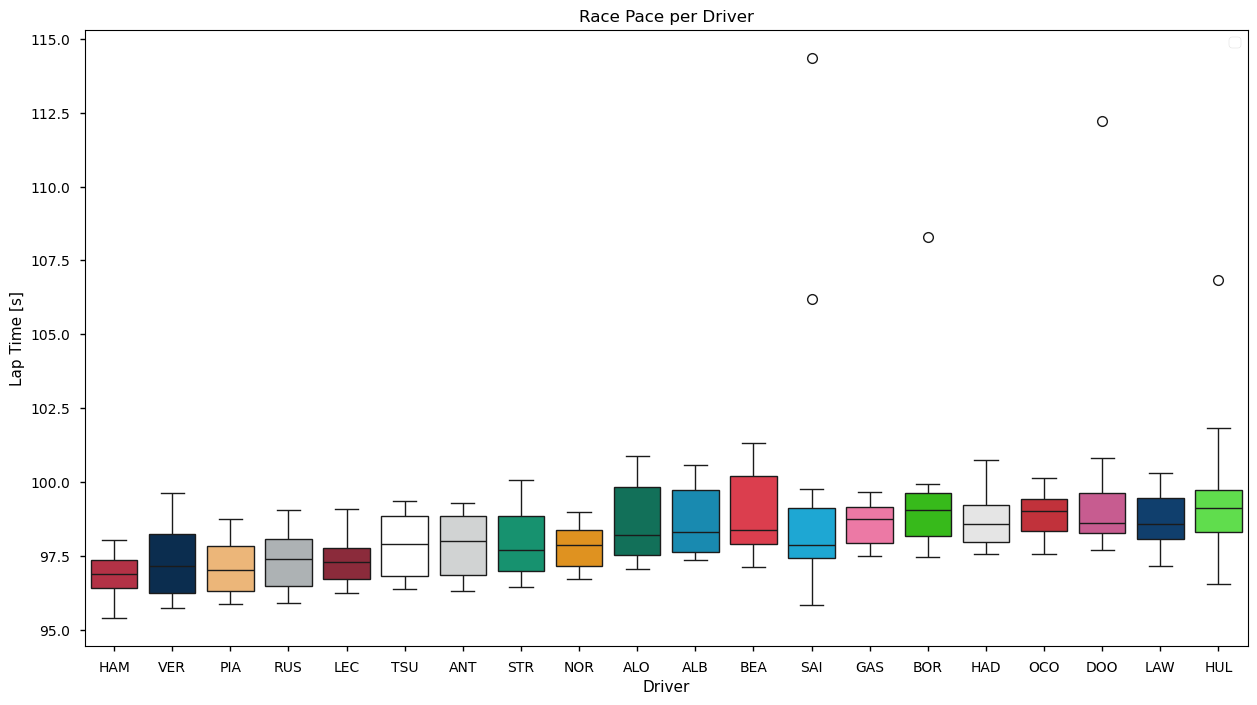

In [21]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_cs,x='Driver',y='LapTimeInSeconds',hue='Driver',palette=driver_colors)
plt.legend(loc='upper right')
plt.title('Race Pace per Driver')
plt.ylabel('Lap Time [s]')
plt.xlabel('Driver')

<h3> Compare two drivers' race pace

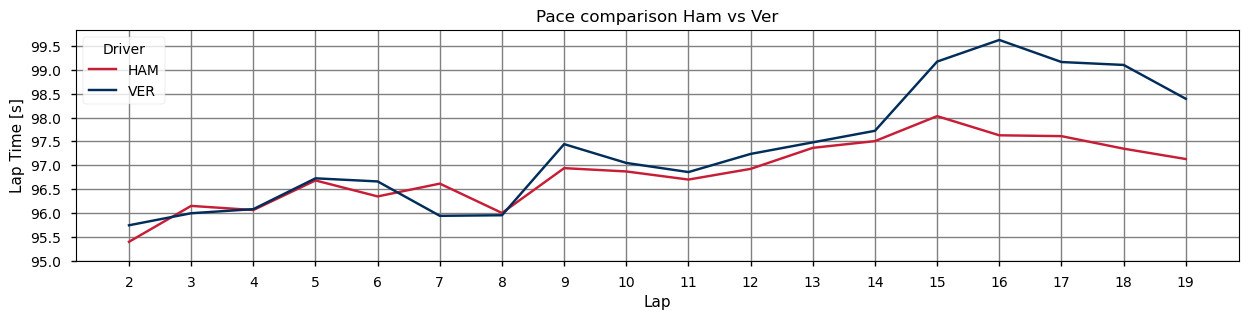

In [22]:
plt.figure(figsize=(15,3))
sns.lineplot(data=df_cs[(df_cs['Driver']=='HAM')|(df_cs['Driver']=='VER')],x='LapNumber',y='LapTimeInSeconds',hue='Driver',palette=driver_colors)
plt.xticks(ticks=df_cs['LapNumber'].unique())
plt.yticks(np.arange(95,100,0.5))
plt.title('Pace comparison Ham vs Ver')
plt.ylabel('Lap Time [s]')
plt.xlabel('Lap')
plt.grid(color='grey')

/var/folders/88/94pqx5n57z5crmg3w50s99y00000gn/T/ipykernel_2018/1443305014.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_cs.groupby('Driver')['SpeedST'].max().sort_values(ascending=False),palette=driver_colors)


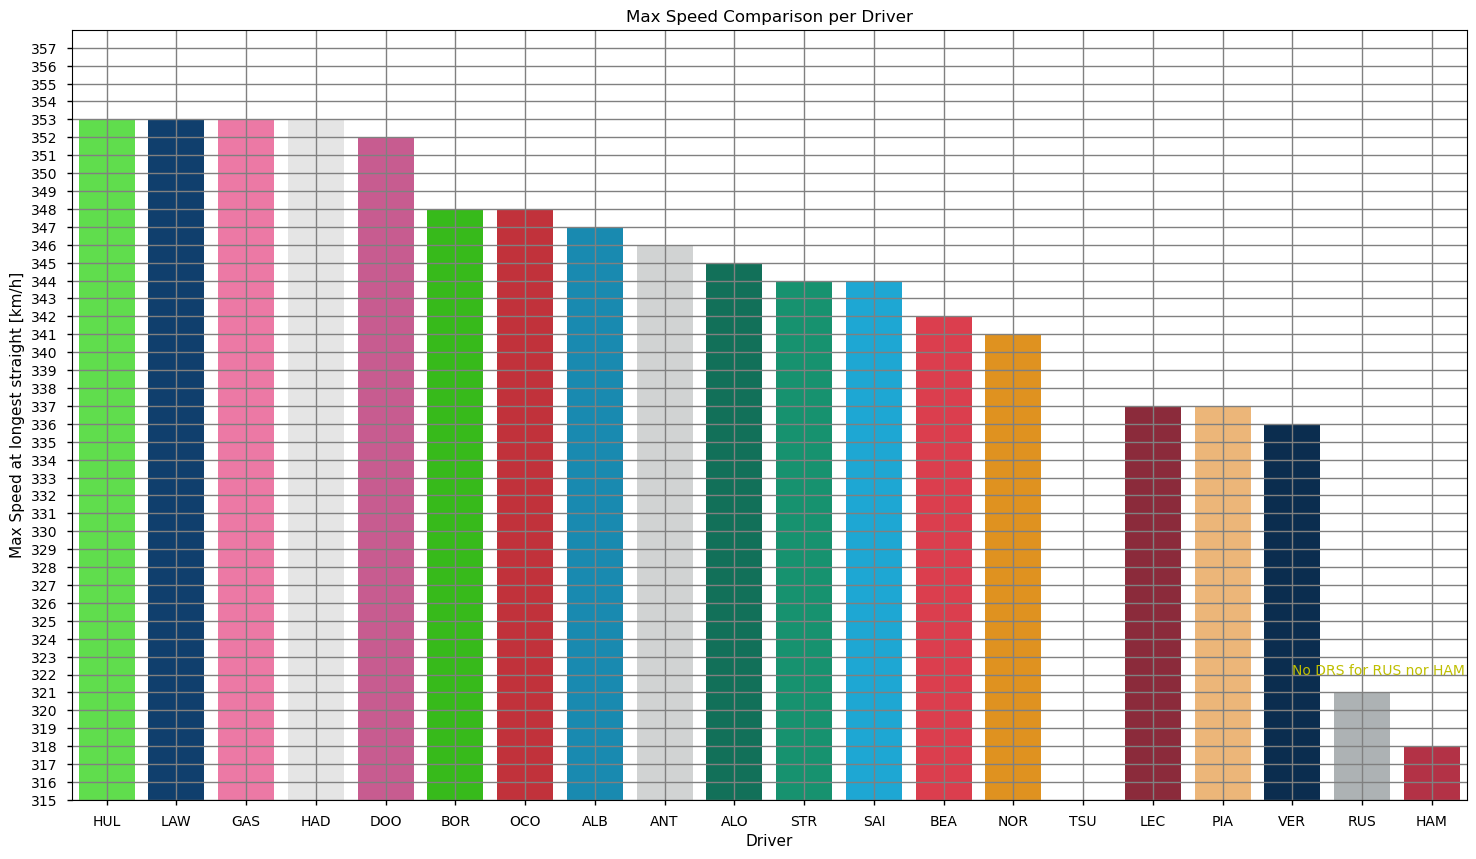

In [23]:
plt.figure(figsize=(18,10))
sns.barplot(data=df_cs.groupby('Driver')['SpeedST'].max().sort_values(ascending=False),palette=driver_colors)
plt.ylim(315,358)
plt.yticks(np.arange(315,358,1),)
plt.annotate(text='No DRS for RUS nor HAM',xy=['VER',322],color='y')
plt.title('Max Speed Comparison per Driver')
plt.ylabel('Max Speed at longest straight [km/h]')
plt.xlabel('Driver')
plt.grid(color='grey')

In [24]:
import utilities as ut

/Users/dario/Documents/Python Stuff/F1/utilities.py:237: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=input_df.groupby('Driver')['SpeedST'].max().sort_values(ascending=False),palette=driver_colors)


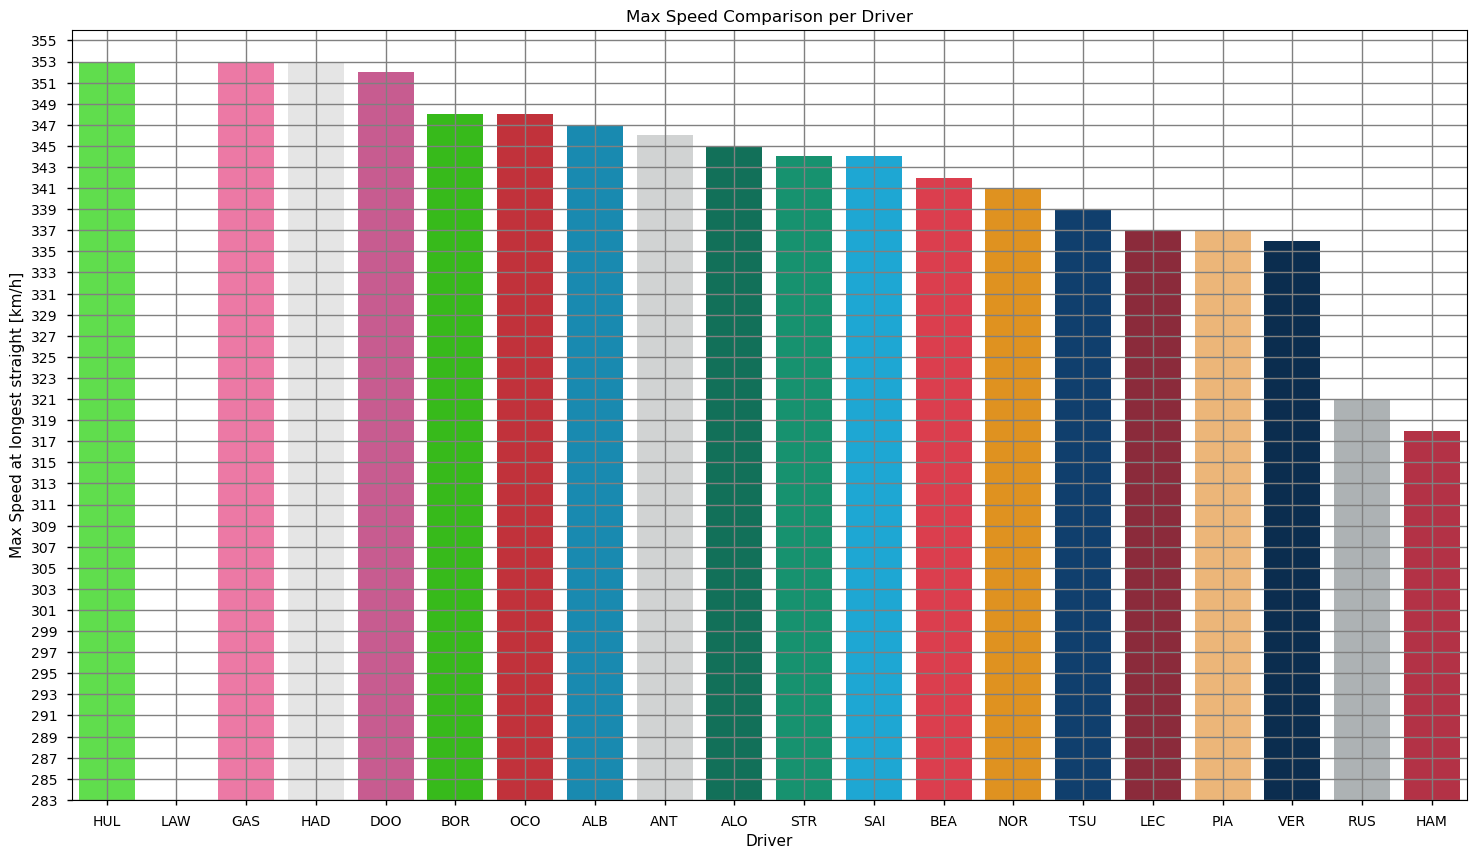

In [25]:
ut.top_speed_comparison_chart(df_cs)

<h3>Has Russell never in been in DRS zone either?

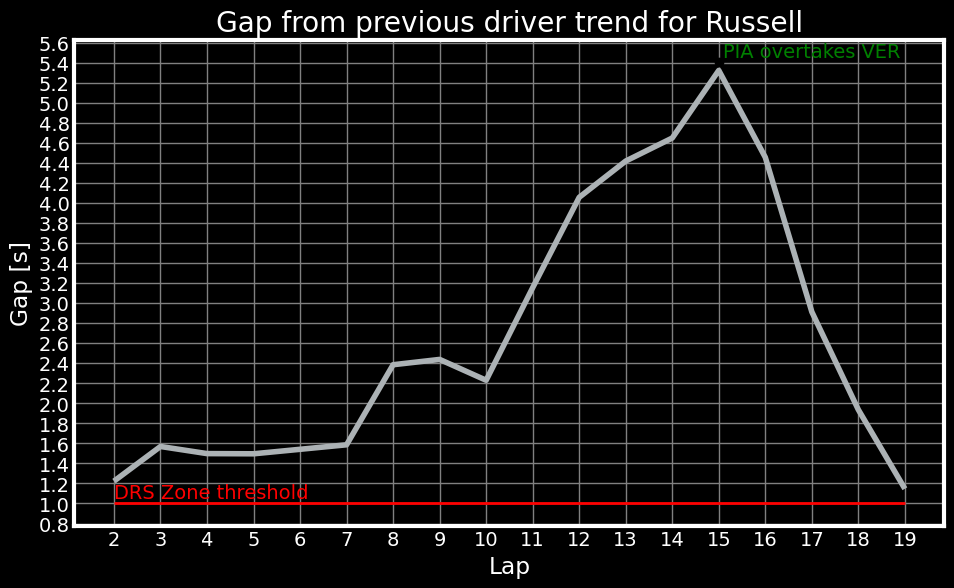

In [136]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_cs[df_cs['Driver']=='RUS'],x='LapNumber',y='GapInSeconds',hue='Driver',palette=driver_colors,legend=False)
plt.xticks(df_cs['LapNumber'].unique())
plt.yticks(np.arange(0,6,0.2))
plt.title('Gap from previous driver trend for Russell')
plt.xlabel('Lap')
plt.ylabel('Gap [s]')
plt.plot([2,19],[1.0,1.0],linewidth=2,color='r')
plt.annotate(text='DRS Zone threshold',xy=[2,1.05],color='r')
plt.annotate(text='PIA overtakes VER',xy=[15.1,5.45],color='green')
plt.plot(15,5.41,marker='o',color='black')
plt.grid(color='grey')

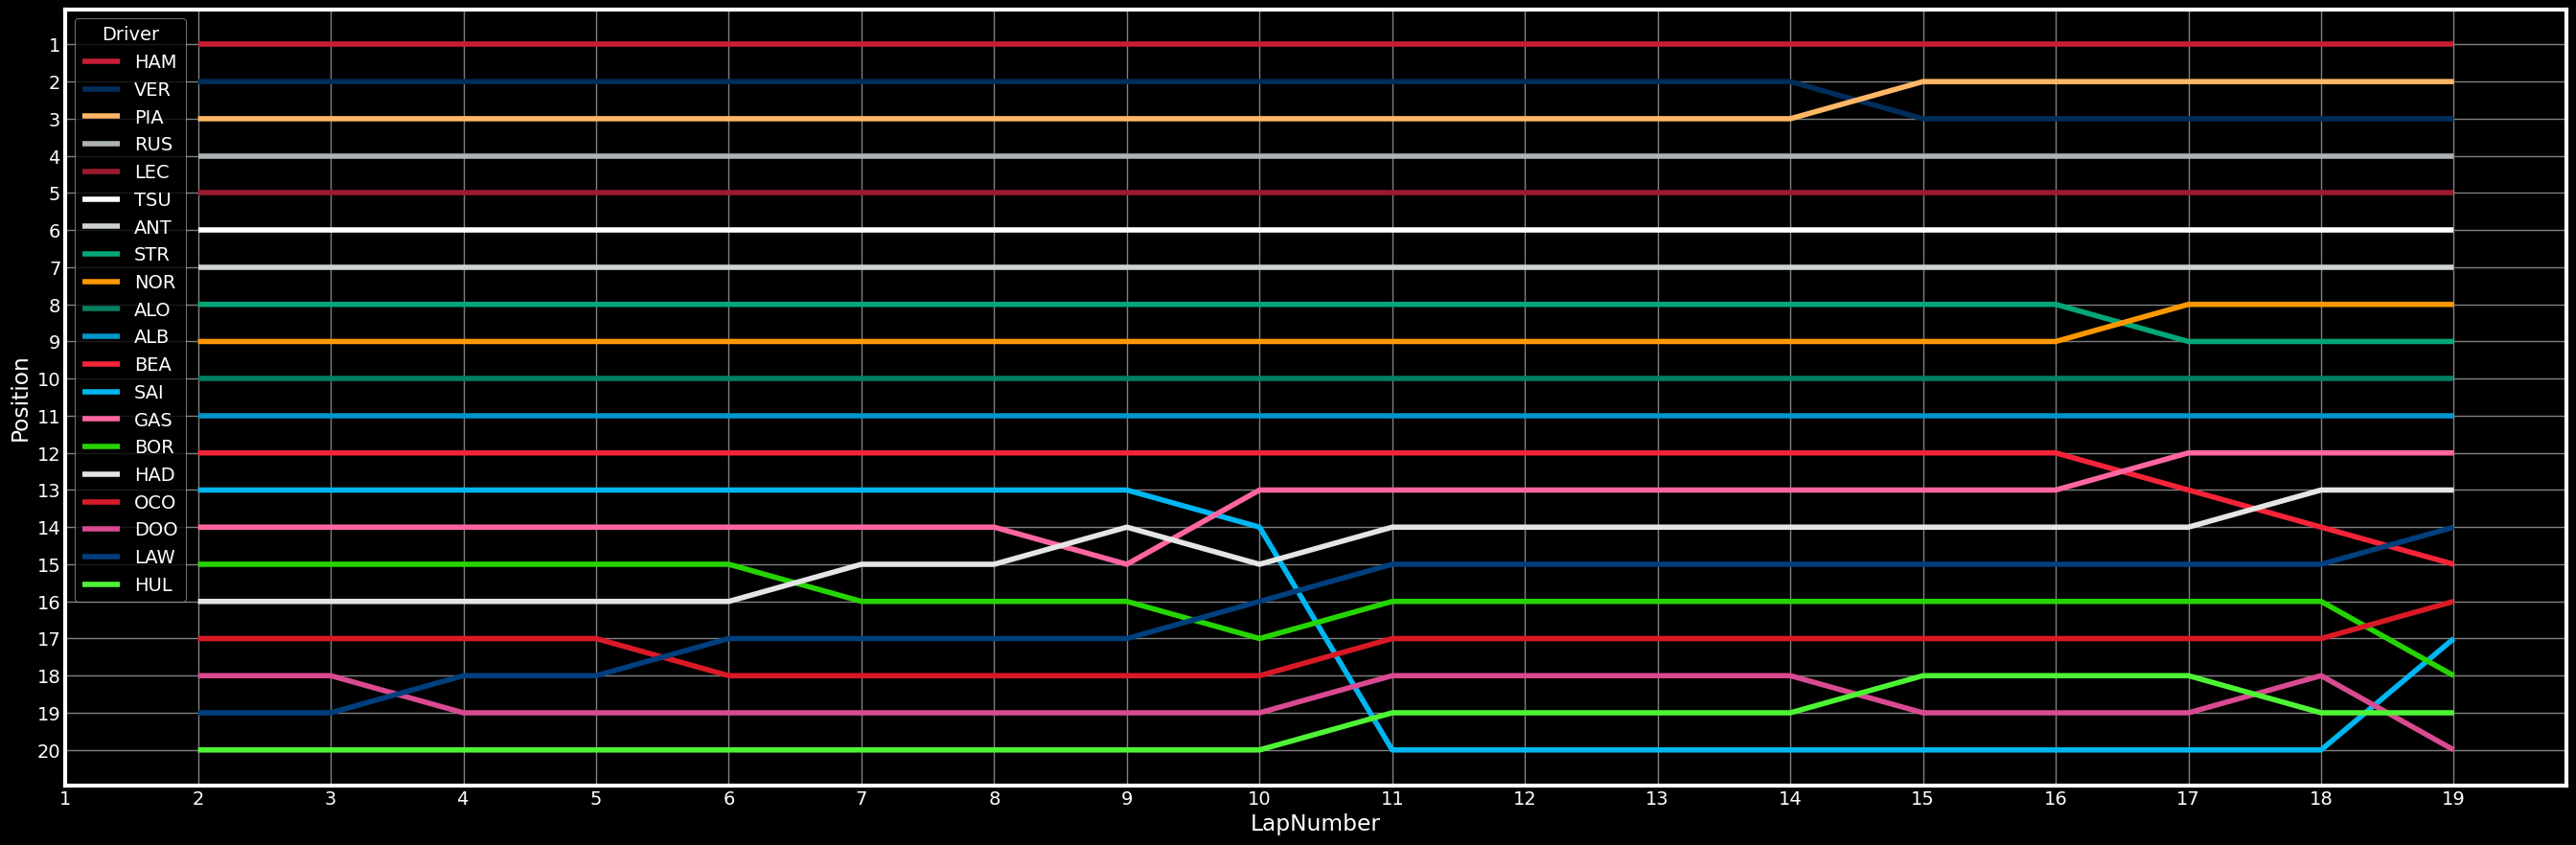

In [137]:
plt.figure(figsize=(30,10))
sns.lineplot(data=df_cs,x='LapNumber',y='Position',hue='Driver',palette=driver_colors)
plt.yticks(np.arange(1,21,1))
plt.xticks(np.arange(1,20,1))
plt.gca().invert_yaxis()
plt.grid(color='grey')

In [106]:
df_cs[df_cs['LapNumber']==17]

,Team,Driver,DriverNumber,Position,Compound,LapTime,LapNumber,SpeedST,Stint,GapInSeconds,LapTimeInSeconds
16,Ferrari,HAM,44,1.0,MEDIUM,0 days 00:01:37.611000,17.0,314.0,1.0,0.000,97.611
35,McLaren,PIA,81,2.0,MEDIUM,0 days 00:01:38.748000,17.0,312.0,1.0,3.785,98.748
54,Red Bull Racing,VER,1,3.0,MEDIUM,0 days 00:01:39.163000,17.0,313.0,1.0,1.453,99.163
73,Mercedes,RUS,63,4.0,MEDIUM,0 days 00:01:38.186000,17.0,315.0,1.0,2.913,98.186
92,Ferrari,LEC,16,5.0,MEDIUM,0 days 00:01:37.340000,17.0,332.0,1.0,1.421,97.340
111,Racing Bulls,TSU,22,6.0,MEDIUM,0 days 00:01:39.038000,17.0,313.0,1.0,7.432,99.038
130,Mercedes,ANT,12,7.0,MEDIUM,0 days 00:01:39.278000,17.0,332.0,1.0,0.516,99.278
149,McLaren,NOR,4,8.0,MEDIUM,0 days 00:01:38.722000,17.0,337.0,1.0,2.200,98.722
168,Aston Martin,STR,18,9.0,MEDIUM,0 days 00:01:40.063000,17.0,312.0,1.0,-0.726,100.063
187,Aston Martin,ALO,14,10.0,MEDIUM,0 days 00:01:40.072000,17.0,312.0,1.0,10.472,100.072


# China Shootout Quali

In [108]:
china_shootout_quali = fastf1.get_session(2025,'China','Sprint Qualifying')
china_shootout_quali.load()

core           INFO 	Loading data for Chinese Grand Prix - Sprint Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core        WARNING 	Sprint Qualifying is not supported by Ergast! Limited results are calculated from timing data.
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
/opt/anaconda3/envs/python_ads_new/lib/python3.9/site-packages/fastf1/core.py:1610: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
/opt/anaconda3/envs/python_ads_new/lib/python3.9/site-packages/fastf1/core.py:1610: FutureWa

In [109]:
sq_df = china_shootout_quali.laps

In [110]:
sq_df.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:16:57.349000,NOR,4,NaT,1.0,1.0,0 days 00:14:48.482000,NaT,NaT,0 days 00:00:35.498000,...,True,McLaren,0 days 00:14:48.482000,2025-03-21 07:32:20.802,1,NaN,False,,False,False
1,0 days 00:18:29.597000,NOR,4,0 days 00:01:32.248000,2.0,1.0,NaT,NaT,0 days 00:00:24.618000,0 days 00:00:27.789000,...,True,McLaren,0 days 00:16:57.349000,2025-03-21 07:34:29.669,1,NaN,False,,False,True
2,0 days 00:20:32.738000,NOR,4,0 days 00:02:03.141000,3.0,1.0,NaT,NaT,0 days 00:00:34.193000,0 days 00:00:38.202000,...,True,McLaren,0 days 00:18:29.597000,2025-03-21 07:36:01.917,1,NaN,False,,False,True
3,0 days 00:22:38.639000,NOR,4,0 days 00:02:05.901000,4.0,1.0,NaT,NaT,0 days 00:00:38.528000,0 days 00:00:35.518000,...,True,McLaren,0 days 00:20:32.738000,2025-03-21 07:38:05.058,1,NaN,False,,False,True
4,0 days 00:24:10.035000,NOR,4,0 days 00:01:31.396000,5.0,1.0,NaT,NaT,0 days 00:00:24.207000,0 days 00:00:27.555000,...,True,McLaren,0 days 00:22:38.639000,2025-03-21 07:40:10.959,1,NaN,False,,False,True


In [111]:
drivers = sq_df['Driver'].unique()
drivers

array(['NOR', 'LEC', 'PIA', 'HAM', 'RUS', 'HUL', 'ALB', 'ALO', 'ANT',
       'TSU', 'BEA', 'STR', 'OCO', 'GAS', 'SAI', 'VER', 'HAD', 'LAW',
       'BOR', 'DOO'], dtype=object)

In [149]:
fastest_laps = []
for driver in drivers:
    fastest_lap_dr = sq_df.pick_drivers(driver).pick_fastest()
    fastest_laps.append(fastest_lap_dr)

fastest_laps = Laps(fastest_laps)

In [150]:
pole_lap = fastest_laps.pick_fastest()
pole_lap

Time                      0 days 00:55:30.837000
Driver                                       HAM
DriverNumber                                  44
LapTime                   0 days 00:01:30.849000
LapNumber                                   14.0
Stint                                        4.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:24.261000
Sector2Time               0 days 00:00:27.249000
Sector3Time               0 days 00:00:39.339000
Sector1SessionTime        0 days 00:54:24.249000
Sector2SessionTime        0 days 00:54:51.498000
Sector3SessionTime        0 days 00:55:30.837000
SpeedI1                                    283.0
SpeedI2                                    278.0
SpeedFL                                    270.0
SpeedST                                    335.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife            

In [151]:
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

In [ ]:
fastest_laps['Delta in seconds'] = fastest_laps['LapTimeDelta'].dt.total_seconds()

In [153]:
fastest_laps.sort_values('Delta in seconds',inplace=True)
fastest_laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapTimeDelta,Delta in seconds
54,0 days 00:55:30.837000,HAM,44,0 days 00:01:30.849000,14.0,4.0,NaT,NaT,0 days 00:00:24.261000,0 days 00:00:27.249000,...,0 days 00:53:59.988000,2025-03-21 08:11:32.308,1,NaN,False,,False,True,0 days 00:00:00,0.000
184,0 days 00:56:57.327000,VER,1,0 days 00:01:30.867000,11.0,4.0,NaT,NaT,0 days 00:00:24.269000,0 days 00:00:27.361000,...,0 days 00:55:26.460000,2025-03-21 08:12:58.780,1,NaN,False,,False,True,0 days 00:00:00.018000,0.018
37,0 days 00:52:08.349000,PIA,81,0 days 00:01:30.929000,10.0,3.0,NaT,NaT,0 days 00:00:24.297000,0 days 00:00:27.317000,...,0 days 00:50:37.420000,2025-03-21 08:08:09.740,1,NaN,False,,False,True,0 days 00:00:00.080000,0.080
26,0 days 00:55:40.416000,LEC,16,0 days 00:01:31.057000,14.0,4.0,NaT,NaT,0 days 00:00:24.322000,0 days 00:00:27.384000,...,0 days 00:54:09.359000,2025-03-21 08:11:41.679,1,NaN,False,,False,True,0 days 00:00:00.208000,0.208
72,0 days 00:52:30.660000,RUS,63,0 days 00:01:31.169000,17.0,3.0,NaT,NaT,0 days 00:00:24.302000,0 days 00:00:27.425000,...,0 days 00:50:59.491000,2025-03-21 08:08:31.811,1,NaN,False,,False,True,0 days 00:00:00.320000,0.320
7,0 days 00:35:27.451000,NOR,4,0 days 00:01:31.174000,8.0,2.0,NaT,NaT,0 days 00:00:24.278000,0 days 00:00:27.499000,...,0 days 00:33:56.277000,2025-03-21 07:51:28.597,1,NaN,False,,False,True,0 days 00:00:00.325000,0.325
114,0 days 00:42:34.197000,ANT,12,0 days 00:01:31.475000,13.0,3.0,NaT,NaT,0 days 00:00:24.488000,0 days 00:00:27.522000,...,0 days 00:41:02.722000,2025-03-21 07:58:35.042,1,NaN,False,,False,True,0 days 00:00:00.626000,0.626
88,0 days 00:42:11.439000,ALB,23,0 days 00:01:31.539000,9.0,2.0,NaT,NaT,0 days 00:00:24.321000,0 days 00:00:27.612000,...,0 days 00:40:39.900000,2025-03-21 07:58:12.220,1,NaN,False,,False,True,0 days 00:00:00.690000,0.690
147,0 days 00:41:26.963000,STR,18,0 days 00:01:31.742000,8.0,2.0,NaT,NaT,0 days 00:00:24.390000,0 days 00:00:27.499000,...,0 days 00:39:55.221000,2025-03-21 07:57:27.541,1,NaN,False,,False,True,0 days 00:00:00.893000,0.893
129,0 days 00:57:36.324000,TSU,22,0 days 00:01:31.773000,11.0,4.0,NaT,NaT,0 days 00:00:24.350000,0 days 00:00:27.627000,...,0 days 00:56:04.551000,2025-03-21 08:13:36.871,1,NaN,False,,False,True,0 days 00:00:00.924000,0.924


In [154]:
fastest_laps.reset_index(inplace=True)
fastest_laps.drop(columns=['index'],inplace=True)

/var/folders/88/94pqx5n57z5crmg3w50s99y00000gn/T/ipykernel_13286/3848255400.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(custom_y_ticks_labels)


(0.0, 1.0)

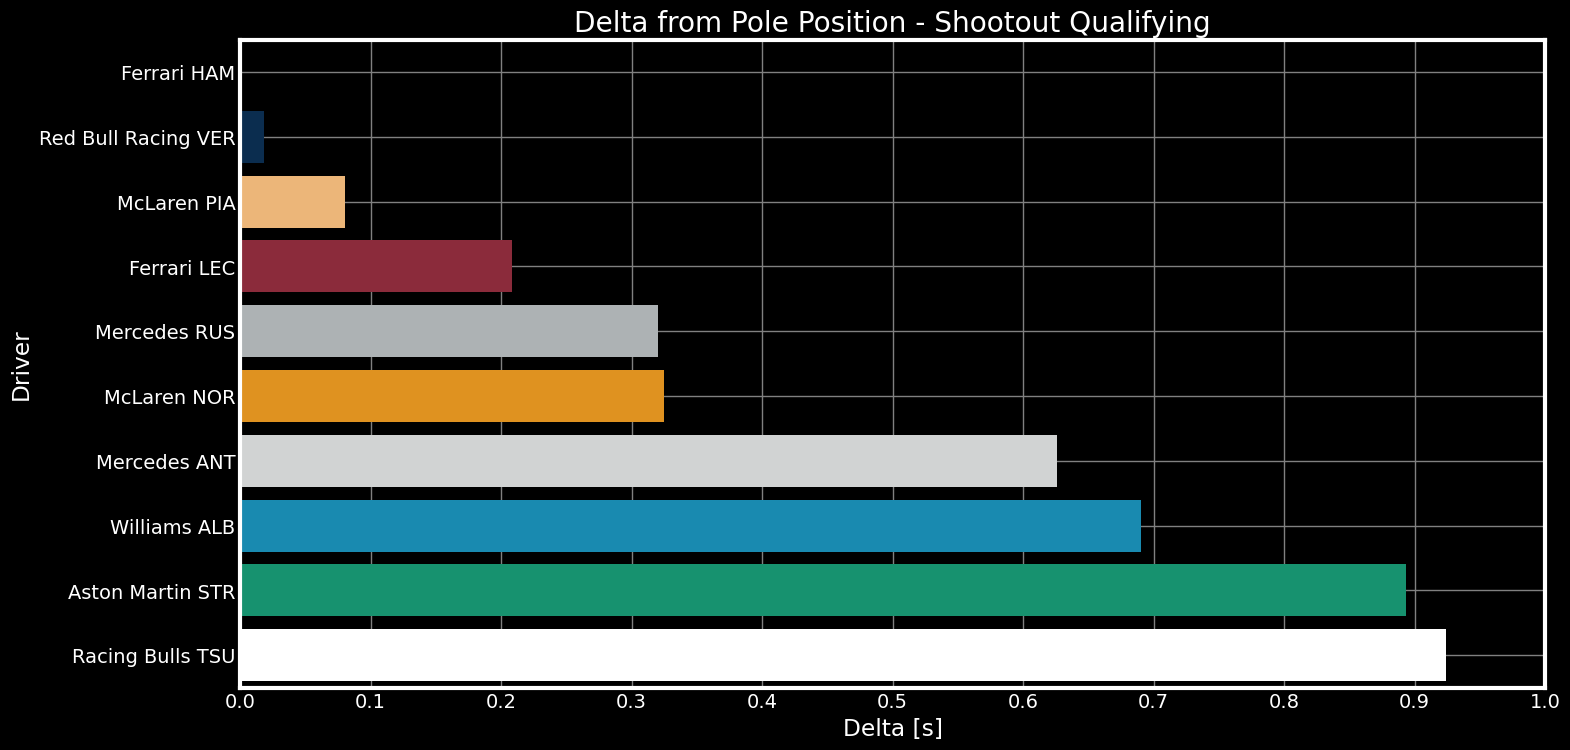

In [155]:
plt.figure(figsize=(15,8))
ax = sns.barplot(orient='horizontal',data=fastest_laps.head(10),x='Delta in seconds',y='Driver',hue='Driver',palette=driver_colors)
plt.title('Delta from Pole Position - Shootout Qualifying')
plt.ylabel('Driver')
plt.xlabel('Delta [s]')
plt.xticks(np.arange(fastest_laps['Delta in seconds'].min(),fastest_laps['Delta in seconds'].max(),0.1))
custom_y_ticks_labels = [f'{team} {drv}' for team, drv, in zip(fastest_laps['Team'],fastest_laps['Driver'])]
ax.set_yticklabels(custom_y_ticks_labels)
plt.grid(axis='both',color='grey')
plt.xlim(0.0,1.0)

# China Quali

In [143]:
china_quali = fastf1.get_session(2025,'China','Qualifying')
china_quali.load()

core           INFO 	Loading data for Chinese Grand Prix - Qualifying [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 

In [145]:
q_df = china_quali.laps

In [156]:
fastest_laps = []
for driver in drivers:
    fastest_lap_dr = q_df.pick_drivers(driver).pick_fastest()
    fastest_laps.append(fastest_lap_dr)

fastest_laps = Laps(fastest_laps)

In [157]:
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']
fastest_laps['Delta in seconds'] = fastest_laps['LapTimeDelta'].dt.total_seconds()
fastest_laps.sort_values('Delta in seconds',inplace=True)

/var/folders/88/94pqx5n57z5crmg3w50s99y00000gn/T/ipykernel_13286/960815932.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(custom_y_ticks_labels)


(0.0, 1.0)

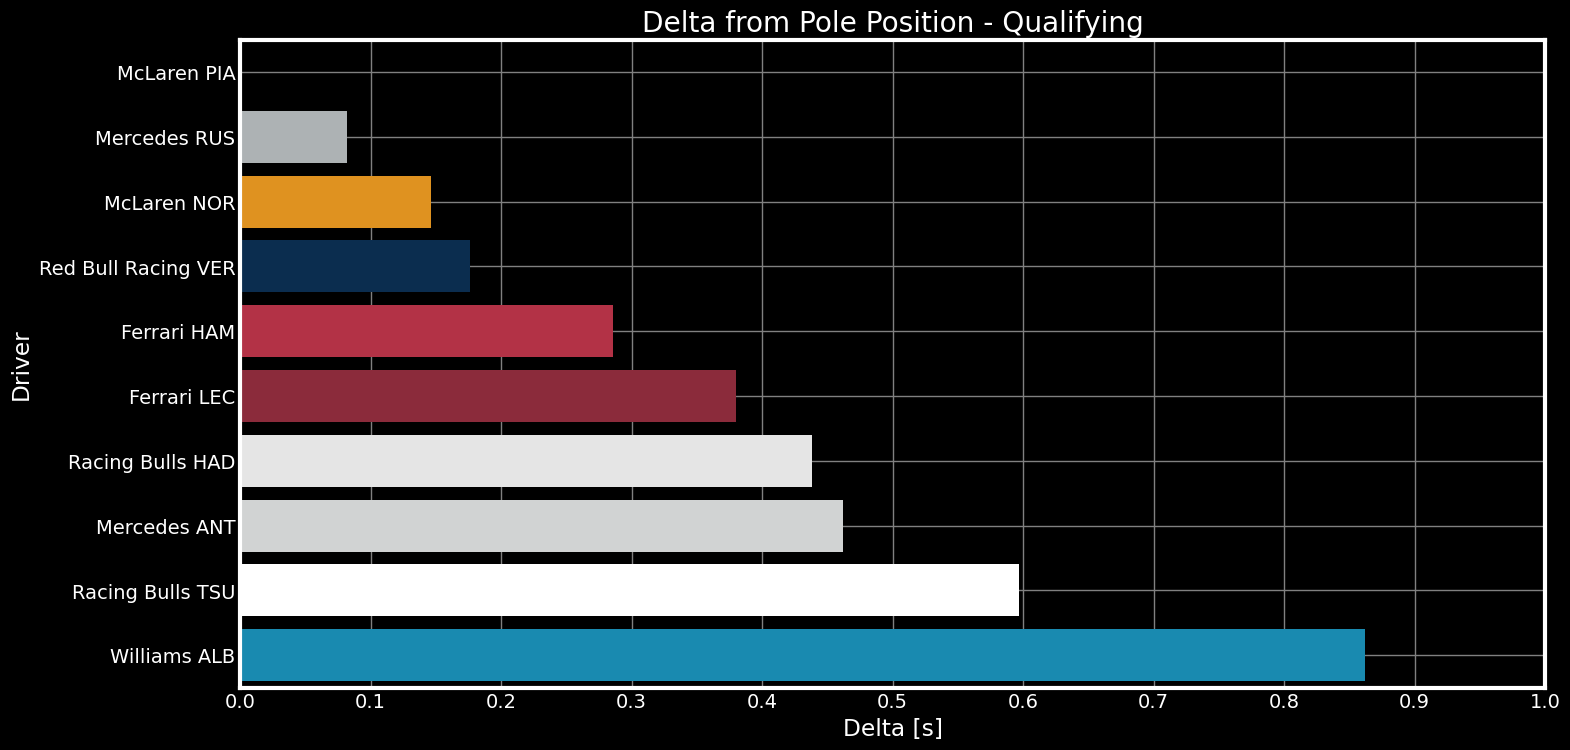

In [159]:
plt.figure(figsize=(15,8))
ax = sns.barplot(orient='horizontal',data=fastest_laps.head(10),x='Delta in seconds',y='Driver',hue='Driver',palette=driver_colors)
plt.title('Delta from Pole Position - Qualifying')
plt.ylabel('Driver')
plt.xlabel('Delta [s]')
plt.xticks(np.arange(fastest_laps['Delta in seconds'].min(),fastest_laps['Delta in seconds'].max(),0.1))
custom_y_ticks_labels = [f'{team} {drv}' for team, drv, in zip(fastest_laps['Team'],fastest_laps['Driver'])]
ax.set_yticklabels(custom_y_ticks_labels)
plt.grid(axis='both',color='grey')
plt.xlim(0.0,1.0)